# Case Study: 1000G

Data for the synthea dataset is derived from the work done in the AnVIL project [https://anvilproject.org]. The data is open access, each patient is connected to a Specimen and several DocumentReference objects containing url to cram and bam files.


In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide

> There is a missing item, Observation.status, so we load with `validation` disabled

In [3]:
graph = load_graph('anvil', manifests.anvil_file_paths(), expected_resource_count=12500)

### Draw a summary graph

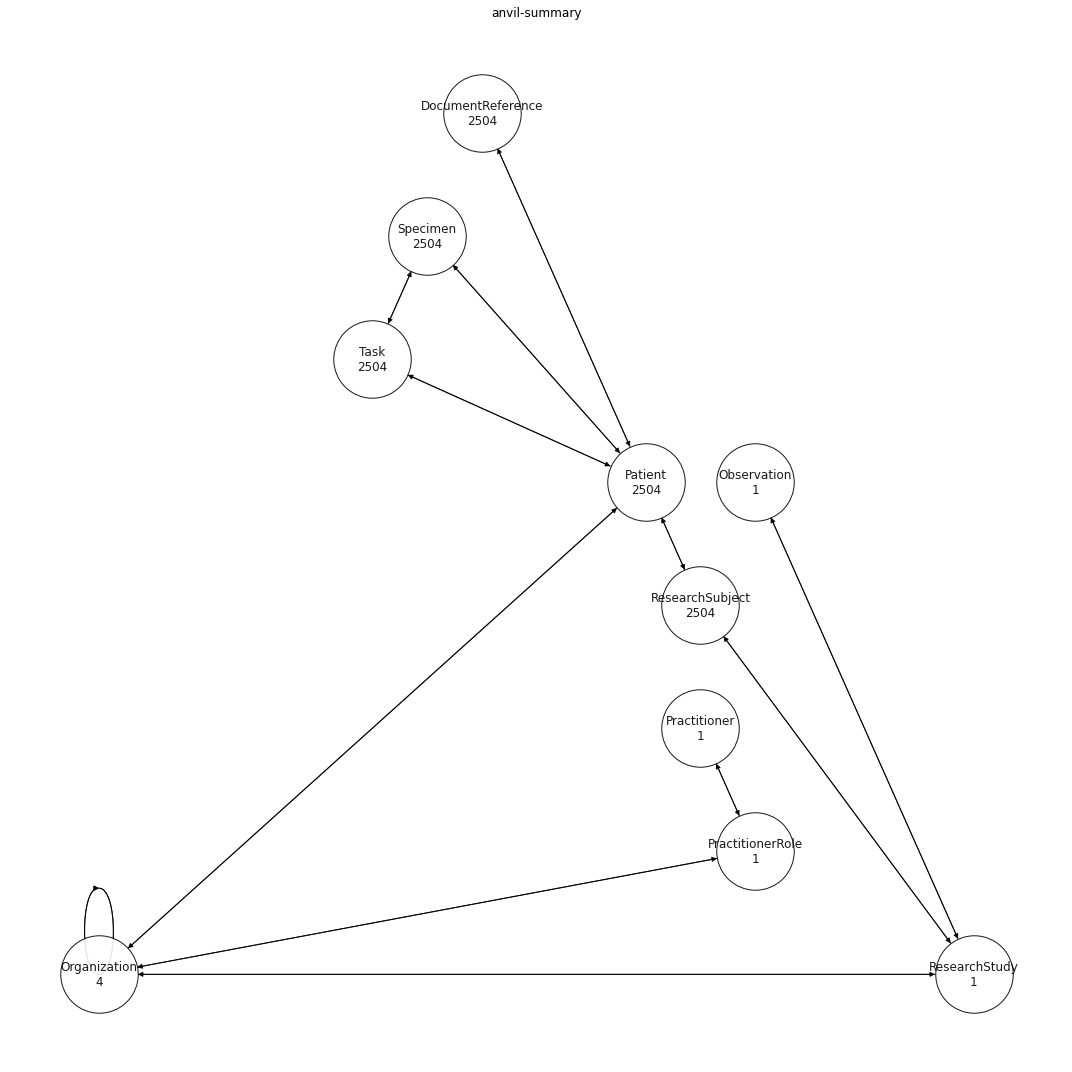

In [4]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'anvil-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [5]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 2504, f"Should have 2504 patients, got {len(patients)}"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [6]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,identifier_0_system,identifier_0_value,managingOrganization_reference,resourceType
0,4346d481-51aa-5550-a149-e31d644052ce,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS000030,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
1,ca321c90-7299-56fd-bca5-f6bee0f2ec8f,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS000031,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
2,1d4a9340-7cb1-51c0-9700-523ab2f7e6aa,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS000032,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
3,c14ee5f5-d5a9-557a-8025-aad39711c39a,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS000033,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
4,616e1a46-178e-5331-8753-b91a9d00690d,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS000034,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
...,...,...,...,...,...
2499,db0ae618-a4e0-5c58-8b74-119a38203a20,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS368516,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
2500,6a4ef312-af65-573c-8c7d-2499e1c4d558,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS368517,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
2501,4317f21b-6f93-53de-8902-cfc6c254a247,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS368519,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient
2502,b9637fe9-6ad7-5d37-b2a0-a5a09f00b632,https://anvil.terra.bio/#workspaces/anvil-data...,participant/SRS368520,Organization/c2797aed-1076-5c19-b386-25bc2406a313,Patient


### Show simplified details

> 1/3 the number of columns

In [7]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] )

,id,identifier_https://anvil.terra.bio/#workspaces/anvil-datastorage/1000G-high-coverage-2019-DEV_ONLY,managingOrganization_reference
0,4346d481-51aa-5550-a149-e31d644052ce,participant/SRS000030,Organization/c2797aed-1076-5c19-b386-25bc2406a313
1,ca321c90-7299-56fd-bca5-f6bee0f2ec8f,participant/SRS000031,Organization/c2797aed-1076-5c19-b386-25bc2406a313
2,1d4a9340-7cb1-51c0-9700-523ab2f7e6aa,participant/SRS000032,Organization/c2797aed-1076-5c19-b386-25bc2406a313
3,c14ee5f5-d5a9-557a-8025-aad39711c39a,participant/SRS000033,Organization/c2797aed-1076-5c19-b386-25bc2406a313
4,616e1a46-178e-5331-8753-b91a9d00690d,participant/SRS000034,Organization/c2797aed-1076-5c19-b386-25bc2406a313
...,...,...,...
2499,db0ae618-a4e0-5c58-8b74-119a38203a20,participant/SRS368516,Organization/c2797aed-1076-5c19-b386-25bc2406a313
2500,6a4ef312-af65-573c-8c7d-2499e1c4d558,participant/SRS368517,Organization/c2797aed-1076-5c19-b386-25bc2406a313
2501,4317f21b-6f93-53de-8902-cfc6c254a247,participant/SRS368519,Organization/c2797aed-1076-5c19-b386-25bc2406a313
2502,b9637fe9-6ad7-5d37-b2a0-a5a09f00b632,participant/SRS368520,Organization/c2797aed-1076-5c19-b386-25bc2406a313


## Navigate using FHIR references

In [8]:
# "retrieve" the study
research_study = find_by_resource_type(graph, 'ResearchStudy')[0][1]['resource']
(research_study, research_study.id)

(<fhirclient.models.researchstudy.ResearchStudy at 0x7f6369db8850>,
 '1000G-high-coverage-2019-DEV-ONLY')

In [9]:
f"The id of the sponsor is {research_study.sponsor.resolved().id}"

'The id of the sponsor is c2797aed-1076-5c19-b386-25bc2406a313'

In [10]:
research_subjects = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'ResearchSubject')]
patients = [research_subject.individual for research_subject in research_subjects]
f"research_subjects: {len(research_subjects)} patients: {len(patients)}"

'research_subjects: 2504 patients: 2504'

In [11]:
tasks = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'Task')]
f"tasks: {len(tasks)}"

'tasks: 2504'

In [12]:
observations = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'Observation')]
f"observations: {len(observations)}"

'observations: 1'

In [13]:
pd.DataFrame([
    {
        **{
            'task': t.identifier[0].value,
            'focus': t.focus.resolved().identifier[0].value,
            'bodySite': t.focus.resolved().collection.bodySite.coding[0].code if t.focus.resolved().collection else '',
            'for': t.for_fhir.resolved().identifier[0].value,
            'gender': t.for_fhir.resolved().gender,
        },
        **{
            graph.nodes.get(output.valueReference.reference)['resource'].content[0].attachment.url.split('.')[-1]:
            graph.nodes.get(output.valueReference.reference)['resource'].content[0].attachment.url
                for output in t.output                
        }
        
    }
    for t in tasks ] 
)

,task,focus,bodySite,for,gender,cram
0,Task/SRS000030,sample/SRS000030,,participant/SRS000030,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
1,Task/SRS000031,sample/SRS000031,,participant/SRS000031,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
2,Task/SRS000032,sample/SRS000032,,participant/SRS000032,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
3,Task/SRS000033,sample/SRS000033,,participant/SRS000033,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
4,Task/SRS000034,sample/SRS000034,,participant/SRS000034,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
...,...,...,...,...,...,...
2499,Task/SRS368516,sample/SRS368516,,participant/SRS368516,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
2500,Task/SRS368517,sample/SRS368517,,participant/SRS368517,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
2501,Task/SRS368519,sample/SRS368519,,participant/SRS368519,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
2502,Task/SRS368520,sample/SRS368520,,participant/SRS368520,None,gs://fc-56ac46ea-efc4-4683-b6d5-6d95bed41c5e/C...
